# Embedded ML - Lab 2.1: TensorFlow

In this lab you will learn the basics of one of the most developed and widely used ML libraries: TensorFlow. It implements many of the most important ML models and algorithms and has optimized back-ends for efficient execution on CPUs, GPUs, TPUs and other devices.

In this lab you are given some helper functions but you are expected to write most of the code and be able to explain it at a high level of abstraction and also to modify any part of it. This lab is important because a significant part of the course will use TensorFlow.

### Learning outcomes


* Explain the basic concepts associated with TensorFlow
* Use the basic workflow of TensorFlow to build a simple ML model
* Implement simple dense networks with TensorFlow and Keras
* Use some of the input handling functions of TensorFlow
* Implement a simple CNN with TensorFlow and Keras
* Implement transfer learning and fine tuning.

In [2]:
# To run this notebook, locally as a jupyter notebook, you need to install the following packages:

#1. Create a virtual environment through conda or venv
#   For example, using conda:
#                conda create -n [myenv] python=3.8
#                conda activate [myenv]
#   Or using venv:
#                python3 -m venv [myenv]
#                source [myenv]/bin/activate
#
#
#2. Activate the virtual environment
#3. Install the required packages using pip
#4. Run the notebook


# Install the required packages
%pip install numpy -q
%pip install matplotlib -q
%pip install tensorflow -q
%pip install scikit-learn -q
%pip install tensorflow-hub -q 
%pip install tensorflow-datasets -q
%pip install tensorflow-estimator -q


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### TensorFlow workflow
As in general with ML, in TensorFlow you have to get or preprocess the model inputs, train the model, run inference and evaluate results.

Here you should use TensorFlow to build a dense 4-layer network to classify items in the FASHION MNIST dataset. Explore a few different hidden-layer sizes and report the accuracy achieved.

Finally, investigate how to export the model to a file and write a separate code that is able to load that model and run inference again.

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



import numpy as np
import matplotlib.pyplot as plt
import os

2025-05-16 23:17:08.265453: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 23:17:08.356571: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 23:17:08.459422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747455428.554572   27413 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747455428.579932   27413 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-16 23:17:08.743602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [5]:
# Pre-process input dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create the model
def create_model(
    hidden_layer1 :int = 128,
    hidden_layer2 :int = 128,
    hidden_layer3 :int = 128,
    learning_rate :float = 0.001
    ):

    """
    Create a simple feedforward neural network model using Keras.
    Args:
        hidden_layer1 (int): Number of neurons in the first hidden layer.
        hidden_layer2 (int): Number of neurons in the second hidden layer.
        hidden_layer3 (int): Number of neurons in the third hidden layer.
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        model (keras.Model): Compiled Keras model.
    """

    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(hidden_layer1, activation='relu'),
        keras.layers.Dense(hidden_layer2, activation='relu'),
        keras.layers.Dense(hidden_layer3, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model



# Train the model
model = create_model()
model.summary()
model.fit(train_images, train_labels, epochs=5)


# Evaluate functional performance
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2025-05-16 22:48:12.649985: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6837 - loss: 3.3403
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7990 - loss: 0.5828
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8272 - loss: 0.4860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8394 - loss: 0.4492
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8499 - loss: 0.4145
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.4305

Test accuracy: 0.8385000228881836


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


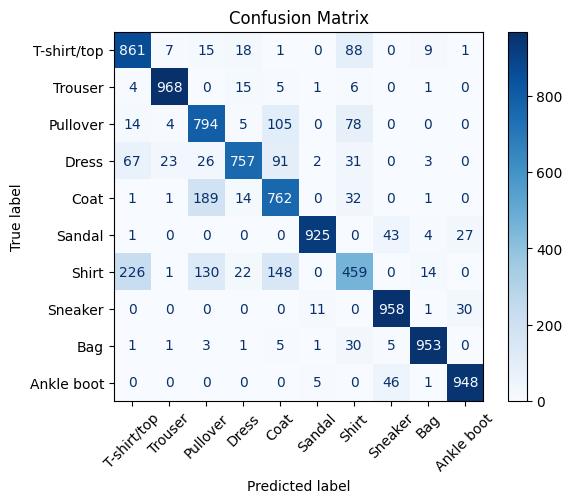

In [6]:
# confusion matrix
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                                            "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
                            )

disp.plot(cmap= 'Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [7]:
# Save the model to a file
def save_model(model, model_name: str = 'fashion_mnist_model'):
    """
    Save the Keras model in a .h5 file format.

    Args:
        model (keras.Model): Keras model to be saved.
        model_name (str): Name of the file to save the model.
    """

    model.save(model_name + ".keras")

    print(f"Model saved as {model_name}"+ ".keras")

# Save the model
save_model(model)
save_model

Model saved as fashion_mnist_model.keras


<function __main__.save_model(model, model_name: str = 'fashion_mnist_model')>

In [8]:
# Instantiate model
models = {}
models_performance = {}

arquitecture = [
    (128, 256, 64, 0.001),
    (64, 128, 256, 0.001),
    (256, 64, 128, 0.001),
    (128, 64, 32, 0.001),
    (64, 64, 32, 0.001),
    (32, 64, 32, 0.001),
    (32, 64, 32, 0.001),
    (256, 256, 256, 0.001)

]

for i in range(1, len(arquitecture)+1):

    models[f'modelo_{i}'] = create_model(
        hidden_layer1=arquitecture[i-1][0],
        hidden_layer2=arquitecture[i-1][1],
        hidden_layer3=arquitecture[i-1][2],
        learning_rate=arquitecture[i-1][3]
        )

    models[f'modelo_{i}'].summary()
    models[f'modelo_{i}'].fit(train_images, train_labels, epochs=5)
    test_loss, test_acc = models[f'modelo_{i}'].evaluate(test_images, test_labels)
    models_performance[f'modelo_{i}'] = (test_loss, test_acc)




/home/julian-sanchez/Universidad/Embedded-Machine-Learning/Lab2/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,602 (588.29 KB)

 Trainable params: 150,602 (588.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2025-05-16 22:49:30.668216: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6841 - loss: 3.1721
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8227 - loss: 0.5039
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8432 - loss: 0.4411
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8543 - loss: 0.4080
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8579 - loss: 0.3950
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8523 - loss: 0.4316


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2025-05-16 22:49:57.501273: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6764 - loss: 2.0831
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7978 - loss: 0.5827
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8330 - loss: 0.4695
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8422 - loss: 0.4323
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8502 - loss: 0.4103
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8378 - loss: 0.4631


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,018 (886.79 KB)

 Trainable params: 227,018 (886.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2025-05-16 22:50:20.625345: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6693 - loss: 3.3010
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7496 - loss: 0.7105
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8059 - loss: 0.5594
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8283 - loss: 0.4973
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8401 - loss: 0.4653
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8441 - loss: 0.4491


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6924 - loss: 3.3411
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8191 - loss: 0.5261
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8367 - loss: 0.4585
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8492 - loss: 0.4208
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8546 - loss: 0.4085
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8159 - loss: 0.5437


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6283 - loss: 3.4820
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7877 - loss: 0.5879
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8266 - loss: 0.4900
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8423 - loss: 0.4360
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8520 - loss: 0.4073
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8195 - loss: 0.4944


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,642 (115.79 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5868 - loss: 2.8818
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7107 - loss: 0.7338
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7279 - loss: 0.6640
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7424 - loss: 0.6148
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7484 - loss: 0.5905
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7481 - loss: 0.5941


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,642 (115.79 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5320 - loss: 3.4059
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7578 - loss: 0.6799
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8061 - loss: 0.5403
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8308 - loss: 0.4897
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8366 - loss: 0.4670
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8234 - loss: 0.4795


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7197 - loss: 3.9054
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8240 - loss: 0.4972
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8398 - loss: 0.4453
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8518 - loss: 0.4136
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8632 - loss: 0.3805
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8405 - loss: 0.4351


modelo_1: test_loss: 0.45049136877059937, test_acc: 0.8490999937057495
modelo_2: test_loss: 0.4745815396308899, test_acc: 0.8324000239372253
modelo_3: test_loss: 0.4571770429611206, test_acc: 0.8416000008583069
modelo_4: test_loss: 0.5510308742523193, test_acc: 0.8184000253677368
modelo_5: test_loss: 0.5045891404151917, test_acc: 0.8187999725341797
modelo_6: test_loss: 0.594280481338501, test_acc: 0.7466999888420105
modelo_7: test_loss: 0.49732640385627747, test_acc: 0.8205000162124634
modelo_8: test_loss: 0.4427124559879303, test_acc: 0.8407999873161316


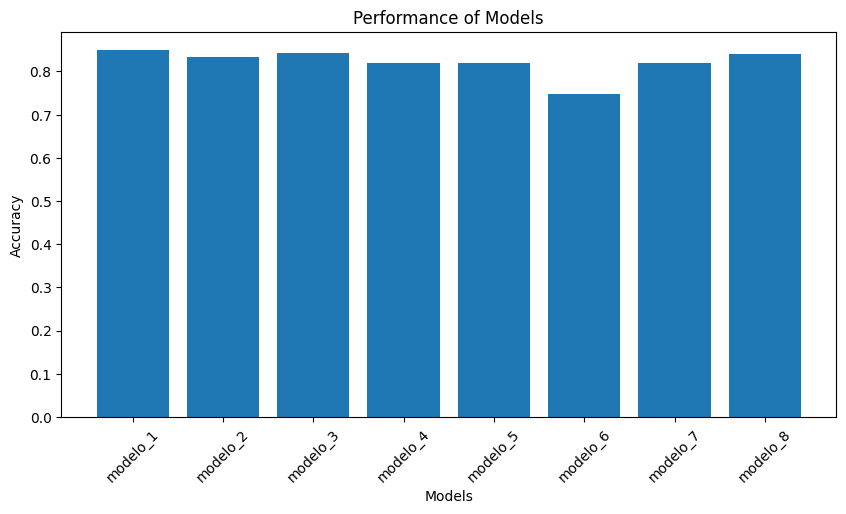

In [9]:
for key, value in models_performance.items():
    print(f"{key}: test_loss: {value[0]}, test_acc: {value[1]}")

# plot the performance of the models
def plot_performance(models_performance):
    """
    Plot the performance of the models.
    Args:
        models_performance (dict): Dictionary containing the performance of the models.
    """
    plt.figure(figsize=(10, 5))
    plt.bar(models_performance.keys(), [value[1] for value in models_performance.values()])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Performance of Models')
    plt.xticks(rotation=45)
    plt.show()

# Plot the performance of the models
plot_performance(models_performance)

In [10]:
# Load the saved model
new_model = create_model()

print("Loading the model from file:")
new_model = tf.keras.models.load_model('fashion_mnist_model.keras')

new_model.summary()


# Verify functional performance
test_loss, test_acc = new_model.evaluate(test_images, test_labels)
print("test lost: ", test_loss, "\ntest acc: ", test_acc)

Loading the model from file:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,384 (1.54 MB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 269,590 (1.03 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.4305
test lost:  0.44364458322525024 
test acc:  0.8385000228881836


### CNNs with TensorFlow
Convolutional Neural Networks add another type of processing layers to extract image features that allow the model to indentify patterns for a much better accuracy results in computer vision applications.

Implement a CNN model to classify the FASHION MNIST dataset and compare the accuracy results with the previous dense model. Also report a comparison of the model size measuring the saved model file size and through an analytical estimation.

In [11]:
# Pre-process input dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

# Create the CNN model
model_conv = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
model_conv.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_conv.summary()

# Train the model
model_conv.fit(train_images, train_labels, epochs=10)

# Evaluate functional performance
test_loss, test_acc = model_conv.evaluate(test_images, test_labels)
print("test_loss: ", test_loss, "\ntest_acc: ", test_acc)

# Save the model to a file
save_model(model_conv, 'fashion_mnist_model_conv')


/home/julian-sanchez/Universidad/Embedded-Machine-Learning/Lab2/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,290 (1.07 MB)

 Trainable params: 281,290 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.7889 - loss: 0.5861
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8875 - loss: 0.3029
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9046 - loss: 0.2518
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9197 - loss: 0.2137
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9287 - loss: 0.1890
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9380 - loss: 0.1610
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9475 - loss: 0.1402
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9522 - loss: 0.1265
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9592 - loss: 0.1083
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9655 - loss: 0.0911
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9098 - loss: 0.3140
test_loss:  0.297803848

In [12]:
def calculate_operations(layer):
    try:
        input_shape = layer.input.shape
        output_shape = layer.output.shape

        if isinstance(layer, tf.keras.layers.Conv2D):

            _, _, _, in_c = input_shape
            _, out_h, out_w, out_c = output_shape
            k_h, k_w = layer.kernel_size

            return int(out_h * out_w * k_h * k_w * in_c * out_c)

        elif isinstance(layer, tf.keras.layers.Dense):
            return int(input_shape[-1] * output_shape[-1])

        else:
            return 0

    except Exception as e:
        print(f"Error en capa {layer.name}: {e}")
        return 0

# Example usage:
total_operations_CNN = sum(calculate_operations(layer) for layer in model_conv.layers)
print(f"Total operations in CNN model: {total_operations_CNN}")
     
total_operations_FFNN = sum(calculate_operations(layer) for layer in model.layers)
print(f"Total operations in FFNN model: {total_operations_FFNN}")



Total operations in CNN model: 9905920
Total operations in FFNN model: 134400


In [13]:
def model_size(archivo1, archivo2):
    """
    Calculate the size of the model files in bytes.
    Args:
        archivo1 (str): Path to the first model file.
        archivo2 (str): Path to the second model file.

    Returns:
        size1 (int): Size of the first model file in bytes.
        size2 (int): Size of the second model file in bytes.
    """
    size1 = os.path.getsize(archivo1)
    size2 = os.path.getsize(archivo2)

    return size1, size2


# Example usage:
first_model_file = 'fashion_mnist_model_conv.keras'
second_model_file = 'fashion_mnist_model.keras'
size1, size2 = model_size(first_model_file, second_model_file)
print(f"Size of {first_model_file} file: {size1} bytes")
print(f"Size of {second_model_file} file: {size2} bytes")

Size of fashion_mnist_model_conv.keras file: 3412880 bytes
Size of fashion_mnist_model.keras file: 1650040 bytes


### Transfer learning and fine tuning
When you want to build a model but do not have enough data or resources to train a network with the accuracy you need, it possible to use a model that has been pre-trained on a large dataset and fine tune it with the target (smaller) dataset to solve the target classification problem.

Here you should use TensorFlow and Keras to download a pre-trained vision model from TensorFlow Hub (e.g. MobileNet V2), add a softmax classification layer and train it with a small subset of the Fashion MNIST dataset.

Compare runtimes and Top-1 accuracy of the resulting model with the dense and convolutional models previously built.



In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

2025-05-16 23:27:08.482521: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 23:27:08.591981: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 23:27:08.644939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747456028.734448   29762 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747456028.758872   29762 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747456028.868427   29762 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from tensorflow import keras
import time

def format_image(image, label):
    # Verificación del tamaño de la imagen puesto que el dataset contiene 2 que corresponden al ancho y alto de la imagen
    if len(image.shape) == 2:
        # Agrega una tercera dimensión referente al canal (color), el cual por defecto es 1 (escala de grises).
        image = tf.expand_dims(image, axis=-1)
        '''El mobilenet_v2 corresponde a un modelo con tres canales por lo que se pasa de escala de grises a RGB
       para mantener la compatibilidad'''
        image = tf.image.grayscale_to_rgb(image)

    # Redimensiona la imagen a (224, 224) para que coincida con el modelo ya entrenado de mobilenet_v2, ya que Fashion MNIST es de 28*28
    image = tf.image.resize(image, (224, 224)) # dim (ancho, alto, #número de canales)

    # Normaliza la imagen dividiendo por 255.0
    image = image / 255.0

    return image, label

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Take a part of the complete dataset
train_images = train_images[:500,:,:]
train_labels = train_labels[:500]
test_images = test_images[:100,:,:]
test_labels = test_labels[:100]


num_examples = len(train_images)
num_classes = len(class_names)

# Convert to tensor datatype
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# split the data in training, validation, and test datasets
BATCH_SIZE = 32
train_batches = train_data.shuffle(num_examples // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = train_data.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_data.map(format_image).batch(1)

# download the pre-trained model and create a Keras meta-layer

module_selection = ("mobilenet_v2", 224, 1280)
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,),
                                   output_shape=[FV_SIZE],
                                   trainable=False)

# This shit to get work 
feature_extractor =  tf.keras.layers.Lambda(feature_extractor)

model = tf.keras.Sequential([
    feature_extractor, 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_batches,
          epochs=5,
          validation_data=validation_batches)


Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280
Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 991ms/step - accuracy: 0.3334 - loss: 1.9798 - val_accuracy: 0.7440 - val_loss: 0.9053
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 925ms/step - accuracy: 0.7787 - loss: 0.7709 - val_accuracy: 0.8140 - val_loss: 0.5531
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 887ms/step - accuracy: 0.8388 - loss: 0.5065 - val_accuracy: 0.8980 - val_loss: 0.3616
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 870ms/step - accuracy: 0.8795 - loss: 0.3773 - val_accuracy: 0.9240 - val_loss: 0.2772
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 881ms/step - accuracy: 0.9348 - loss: 0.2502 - val_accuracy: 0.9560 - val_loss: 0.2065


In [6]:
test_loss, test_acc = model.evaluate(test_batches)
print("test lost: ", test_loss, "\ntest acc: ", test_acc)

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7433 - loss: 0.6329
test lost:  0.6398820281028748 
test acc:  0.7400000095367432


In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        64,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,682 (756.57 KB)

 Trainable params: 64,560 (252.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 129,122 (504.39 KB)

## Conclusions:

* This practice provides an introduction to the TensorFlow experience in building and training classification models. TensorFlow is one of the most widely used libraries for developing neural networks, offering a user-friendly interface and extensive support for deploying a wide range of models with various architectures. One of its most notable features is its ease of use and flexibility, which allows users to quickly prototype and implement different types of neural networks efficiently. 

* For the purpose of introducing and comparing models, this practice focuses on building and training two different neural network architectures for image classification using the Fashion MNIST dataset. The comparison between dense neural networks (ANNs) and convolutional neural networks (CNNs) reveals significant differences in terms of computational complexity and model size. The CNN model requires approximately 9,905,920 operations, compared to just 134,400 for the ANN. In terms of storage, the CNN model occupies 3,412,880 bytes, while the ANN model uses only 1,650,040 bytes. These metrics clearly highlight the trade-offs between model complexity, computational requirements, and storage space. Although CNNs tend to achieve higher accuracy in image-related tasks due to their ability to capture spatial features, they often demand more computational resources and memory because of their deeper architectures and greater number of parameters.


* Finally, this lab introduced the strategy of transfer learning, which proved to be a highly efficient approach for leveraging pre-trained models and adapting them to specific tasks. This technique is especially useful when the available dataset for training and validation is limited or constrained, and there is no guarantee of high-quality or diverse data samples. By using a small subset of data, it is still possible to achieve satisfactory accuracy metrics, thanks to the general knowledge embedded in the pre-trained model. Transfer learning significantly reduces training time and computational cost, while maintaining strong performance. 

